# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [4]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
# Your code here
import re

def bring(value):
    value = re.findall('\d*\.\d|\d', value)[0]
    return float(value)



In [6]:
fifa['Value'] = fifa['Value'].apply(bring)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.0,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,7.0,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.0,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [7]:
fifa['Preferred_Foot'] = fifa['Preferred Foot']

In [8]:
fifa.drop(['Preferred Foot'],axis=1)

,Name,Age,Nationality,Overall,Potential,Club,Value,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Preferred_Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,Left
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.0,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,Right
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,Right
3,De Gea,27,Spain,91,93,Manchester United,7.0,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,Right
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.0,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,Right
5,E. Hazard,27,Belgium,91,91,Chelsea,9.0,LF,4.0,94.0,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,Right
6,L. Modrić,32,Croatia,91,91,Real Madrid,6.0,RCM,4.0,80.0,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,Right
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,8.0,RS,4.0,86.0,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,Right
8,Sergio Ramos,32,Spain,91,91,Real Madrid,5.0,RCB,3.0,76.0,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,Right
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,6.0,GK,3.0,43.0,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,Right


In [9]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('Value ~ C(Position)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Position),3124.064159,26.0,7.166335,5.090825e-26
Residual,303813.930473,18120.0,NaN,NaN


In [11]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('Value ~ C(Preferred_Foot)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),58.227277,1.0,3.44264,0.06355
Residual,307099.358840,18157.0,NaN,NaN


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.166
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.09e-26
Time:                        14:40:36   Log-Likelihood:                -51318.
No. Observations:               18147   AIC:                         1.027e+05
Df Residuals:                   18120   BIC:                         1.029e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4363      0.132     33.534      0.000       4.177       4.696
C(Position)[T.CB]     -0.4649      0.164     -2.833      0.005      -0.787      -0.143
C(Position)[T.CDM]    -0.1576      0.188     -0.840      0.401      -0.525       0.210
C(Position)[T.CF]      0.4299      0.494      0.870      0.384      -0.538       1.398
C(Position)[T.CM]     -0.3378      0.172     -1.966      0.049      -0.675      -0.001
C(Position)[T.GK]     -0.6375      0.161     -3.970      0.000      -0.952      -0.323
C(Position)[T.LAM]     2.4399      0.903      2.701      0.007       0.669       4.210
C(Position)[T.LB]     -0.4214      0.174     -2.426      0.015      -0.762      -0.081
C(Position)[T.LCB]     0.0134      0.208      0.064      0.949      -0.395       0.422
C(Position)[T.LCM]     0.9216      0.245      3.764      0.000       0.442       1.402
C(Position)[T.LDM]     0.1501      0.294      0.510      0.610      -0.426       0.727
C(Position)[T.LF]      2.4903      1.065      2.337      0.019       0.402       4.579
C(Position)[T.LM]     -0.0906      0.181     -0.500      0.617      -0.446       0.264
C(Position)[T.LS]      0.3511      0.314      1.119      0.263      -0.264       0.966
C(Position)[T.LW]      0.4529      0.248      1.826      0.068      -0.033       0.939
C(Position)[T.LWB]    -0.4479      0.482     -0.929      0.353      -1.393       0.497
C(Position)[T.RAM]     1.7875      0.903      1.979      0.048       0.017       3.558
C(Position)[T.RB]     -0.3582      0.175     -2.051      0.040      -0.700      -0.016
C(Position)[T.RCB]    -0.1339      0.207     -0.647      0.518      -0.540       0.272
C(Position)[T.RCM]     0.5302      0.246      2.158      0.031       0.049       1.012
C(Position)[T.RDM]     0.0713      0.292      0.245      0.807      -0.500       0.643
C(Position)[T.RF]      6.4574      1.032      6.256      0.000       4.434       8.481
C(Position)[T.RM]      0.1022      0.180      0.568      0.570      -0.251       0.455
C(Position)[T.RS]      0.4425      0.316      1.399      0.162      -0.178       1.063
C(Position)[T.RW]      0.5139      0.251      2.051      0.040       0.023       1.005
C(Position)[T.RWB]    -0.1340      0.459     -0.292      0.770      -1.033       0.765
C(Position)[T.ST]     -0.1837      0.159     -1.155      0.248      -0.495       0.128
==============================================================================
Omnibus:                    23678.599   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9527252.942
Skew:                           7.053   Prob(JB):                         0.00
Kurtosis:                     114.360   Cond. No.                         36.7
==============================================================================

What is your conclusion from this ANOVA?

In [13]:
#Your conclusions here:
#Conclusion1: The p-value is very small for position, certainly smaller than 0.05. Therefore, we reject the null hypothesis and conclude that the rates differ by Position.
#Conclusion2: The p-value is small for Prefered foot, but no smaller than 0.05. Therefore, we do . not reject the null hypothesis and conclude that the rates don´t differ by Position.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [14]:
# Your code here:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('Value ~ C(Nationality)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Nationality),7559.396795,163.0,2.791884,6.548459e-29
Residual,299716.713645,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [15]:
#Your conclusions here:
#Conclusion1: The p-value is very small for position, certainly smaller than 0.05. Therefore, we reject the null hypothesis and conclude that the rates differ by Nationality.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [19]:
# Your code here:
fifa.isna().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Preferred_Foot     48
dtype: int64

In [26]:
fifa.dropna(inplace=True)

In [27]:
fifa.isna().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
Preferred_Foot    0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [28]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Preferred_Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,Left
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.0,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,Right
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,Right
3,De Gea,27,Spain,91,93,Manchester United,7.0,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,Right
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.0,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,Right


In [29]:
# Your code here:
import statsmodels.api as sm
X = sm.add_constant(fifa[['SprintSpeed', 'Stamina']]) # adding a constant
Y = fifa.Value


/Users/p.matanzo/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [30]:
# Your conclusions here:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.01e-68
Time:                        18:20:05   Log-Likelihood:                -50595.
No. Observations:               17918   AIC:                         1.012e+05
Df Residuals:                   17915   BIC:                         1.012e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8892      0.146     12.944      

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [31]:
# Your code here:
import statsmodels.api as sm
X = sm.add_constant(fifa[['Potential']]) # adding a constant
Y = fifa.Value


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1513.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):          7.84e-318
Time:                        18:21:41   Log-Likelihood:                -50024.
No. Observations:               17918   AIC:                         1.001e+05
Df Residuals:                   17916   BIC:                         1.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9826      0.344    -26.143      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
#1st model
#The r squared is 0.017 when using ['SprintSpeed', 'Stamina'] to view the linear regresion, is relatively small. This means that our model only captures 17% of the variation in the data.
#The p-value in firstt model is very small, this means that the slope is significantly different from zero.

#2nd model
#The r squared is 0.078 when using ['Potential'] to view the linear regresion, is big. This means that our model only captures 78% of the variation in the data.
#The p-value in firstt model is very small, this means that the slope is significantly different from zero.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

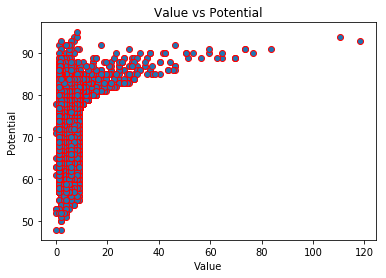

In [35]:
# Your code here:
import matplotlib.pyplot as plt

Value = fifa['Value']
Potential = fifa['Potential']

plt.scatter(Value, Potential, edgecolors='r')
plt.xlabel('Value')
plt.ylabel('Potential')
plt.title('Value vs Potential')
plt.show()
